<a href="https://colab.research.google.com/github/victorjrvieiras/Coletando-dados-do-mercado-financeiro/blob/main/Dados_das_a%C3%A7%C3%B5es_de_petr%C3%B3leo_e_g%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas



In [70]:
import pandas as pd
import chardet
import requests
from io import StringIO

Preparando o documento para ser lido

In [72]:
# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/victorjrvieiras/Coletando-dados-do-mercado-financeiro/refs/heads/main/statusinvest-busca-avancada.csv'

# Baixando o conteúdo do arquivo CSV
response = requests.get(url)
content = response.content

# Detectando a codificação correta do arquivo
encoding_detected = chardet.detect(content)['encoding']

# Convertendo os bytes para string com a codificação correta
content_str = content.decode(encoding_detected)

# Lendo o CSV a partir da string (simulando um arquivo)
dados_mercado = pd.read_csv(StringIO(content_str), delimiter=';', on_bad_lines='skip')

# Verificar os nomes das colunas
print("Colunas do dataset:", dados_mercado.columns)

# Se "PRECO" não estiver no dataset, encontrar o nome correto
colunas_similares = [col for col in dados_mercado.columns if "PRECO" in col.upper()]
if colunas_similares:
    print("Coluna de preço encontrada:", colunas_similares[0])
    dados_mercado.rename(columns={colunas_similares[0]: "PRECO"}, inplace=True)
else:
    print("⚠️ Nenhuma coluna com 'PRECO' encontrada. Verifique os dados!")

# 🔧 Limpando a coluna "PRECO"
dados_mercado['PRECO'] = dados_mercado['PRECO'].astype(str)  # Garantir que é string
dados_mercado['PRECO'] = dados_mercado['PRECO'].str.replace(r'[^\d,.-]', '', regex=True)  # Remove símbolos
dados_mercado['PRECO'] = dados_mercado['PRECO'].str.replace(',', '.')  # Substituir vírgula decimal
dados_mercado['PRECO'] = pd.to_numeric(dados_mercado['PRECO'], errors='coerce')  # Converter para número

# 🔍 Verificando se os valores agora aparecem corretamente
print("Valores únicos de PRECO:", dados_mercado['PRECO'].unique())

# 🚀 Agrupando e exibindo o resultado final
dados_preco = dados_mercado.groupby('TICKER', as_index=False)[['PRECO']].sum().sort_values(by='PRECO', ascending=False)

# 🔍 Exibir os primeiros valores
print(dados_preco.head(10))

Colunas do dataset: Index(['TICKER', 'PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT',
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'],
      dtype='object')
Coluna de preço encontrada: PRECO
Valores únicos de PRECO: [20.94  7.7   1.76 21.8   1.63 39.24 35.97 37.58  1.88 15.65  2.83 17.81
 18.73]
   TICKER  PRECO
5   PETR3  39.24
7   PRIO3  37.58
6   PETR4  35.97
3   ENAT3  21.80
0   BRAV3  20.94
12  VBBR3  18.73
11  UGPA3  17.81
9   RECV3  15.65
1   CSAN3   7.70
10  RPMG3   2.83


Criando o gráfico

<ipython-input-77-e5776e6dadb7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dados_preco['TICKER'][:10], y=dados_preco['PRECO'][:10], palette='plasma')


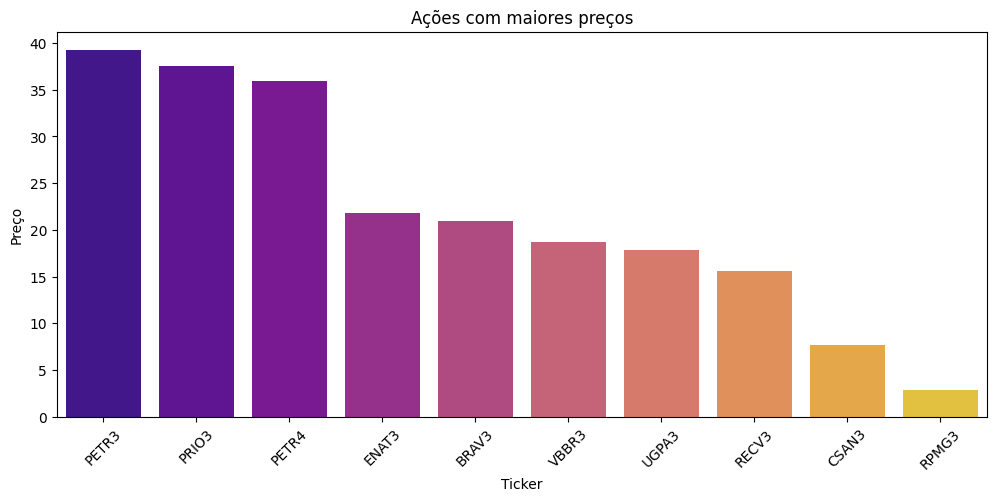

In [77]:
#Criando um gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x=dados_preco['TICKER'][:10], y=dados_preco['PRECO'][:10], palette='plasma')
plt.title('Ações com maiores preços')
plt.xlabel('Ticker')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()